<a href="https://www.kaggle.com/code/eminecansuakgul/anomalydetection?scriptVersionId=150252347" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Applications of Anomaly Detection
* Fraud detection in financial transactions and credit card usage
* Network intrusion detection in cybersecurity
* Equipment failure prediction and maintenance scheduling in manufacturing and industrial settings
* Healthcare monitoring and disease outbreak detection
* Quality control in production processes
* Anomaly detection in sensor data for IoT applications
* Monitoring server and application logs for system failure and error detection
* Traffic analysis and anomaly detection in transportation and logistics
* Video surveillance and anomaly detection in security systems
* Identifying anomalies in user behavior for fraud prevention and security purposes.

## Isolation Forest

Normalde makine öğrenimi algoritmalarında datayı daha iyi genellemek(amaç inlier dataları bulmak) isteriz. Aksine Isolation Forest, outlier/anomaly tespit etmek üzerine geliştirilmiştir. Makalesine [buradan](https://www.researchgate.net/publication/224384174_Isolation_Forest) erişebilirsiniz.

<img src="https://miro.medium.com/v2/resize:fit:1400/0*_zoKAa3K0gTzeZVI.gif"  width="600" height="600">

### Temel Mantığı
Outliers/Anomalileri, genellikle az sayıda ve farklı oldukları için bu değerleri izole etmek daha kolaydır. Algoritma, rastgele seçilen featurelar(x) ve y değerleri üzerinde ağaç yapıları oluşturarak çalışır. Her ağaç, rastgele değerler seçerek başlar ve küçük/büyük şeklinde ayırma işlemi yapar. Veri noktaları izole olana kadar devam eder. Genellikle ağacın köküne(root) yakın olanların anomalidir.

![Isolation Forest Algorithm](https://miro.medium.com/v2/resize:fit:1400/1*YMfmEh2MQ_s8ZHji4OxdPw.png)

## Isolation Forest'la Anomaly Detection

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate a synthetic dataset with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 2))
outliers = np.random.normal(loc=10, scale=2, size=(10, 2))
data = np.vstack([normal_data, outliers]) #vertically stack (concatenate) two or more arrays along their vertical axis. 
data

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       ...,
       [11.65894968,  9.61234772],
       [ 9.47097032,  5.99227527],
       [11.27083606,  7.52148321]])

In [3]:
# Create a Pandas DataFrame
columns = ['Feature1', 'Feature2']
df = pd.DataFrame(data, columns=columns)
df.head()

,Feature1,Feature2
0,0.496714,-0.138264
1,0.647689,1.523030
2,-0.234153,-0.234137
3,1.579213,0.767435
4,-0.469474,0.542560


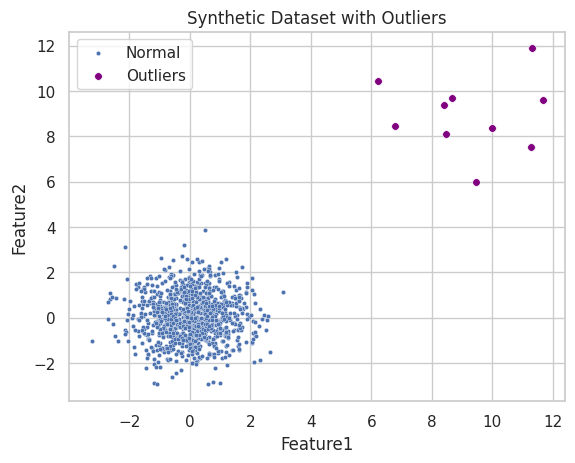

In [4]:
sns.set(style="whitegrid")

# Create a scatter plot for normal data
sns.scatterplot(x='Feature1', y='Feature2', data=df, s=10, label='Normal') # s size of markers

# Create a scatter plot for outliers
sns.scatterplot(x=outliers[:, 0], y=outliers[:, 1], s=30, color='purple', label='Outliers')

# Set plot title and labels
plt.title('Synthetic Dataset with Outliers')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Display legend
plt.legend()

# Show the plot
plt.show()

**Standard Scaler() bir veri kümesindeki özellikleri standart bir normal dağılıma dönüştürmek için kullanılır. Bu işlem, her özelliği ortalaması 0 ve standart sapması 1 olacak şekilde yeniden ölçeklendirir.**

In [5]:
#Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=columns)
df_scaled

,Feature1,Feature2
0,0.279673,-0.210116
1,0.393017,1.022110
2,-0.269027,-0.281227
3,1.092360,0.461665
4,-0.445694,0.294869
...,...,...
1005,5.000522,6.178237
1006,6.259408,5.915401
1007,8.659735,7.022171
1008,7.017107,4.337068


## Isolation Forest Modeli Train Edelim
* Contamination parametresi threshold gibi düşünülebilir. Verimizdeki outlier oranını baz alarak tune edebiliriz.
* Isolation Forest detaylarını bu [siteden](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) inceleyebilirsiniz.

In [6]:
# Train an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(df_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

In [7]:
# Predict outliers
df['Anomaly'] = model.predict(df_scaled)

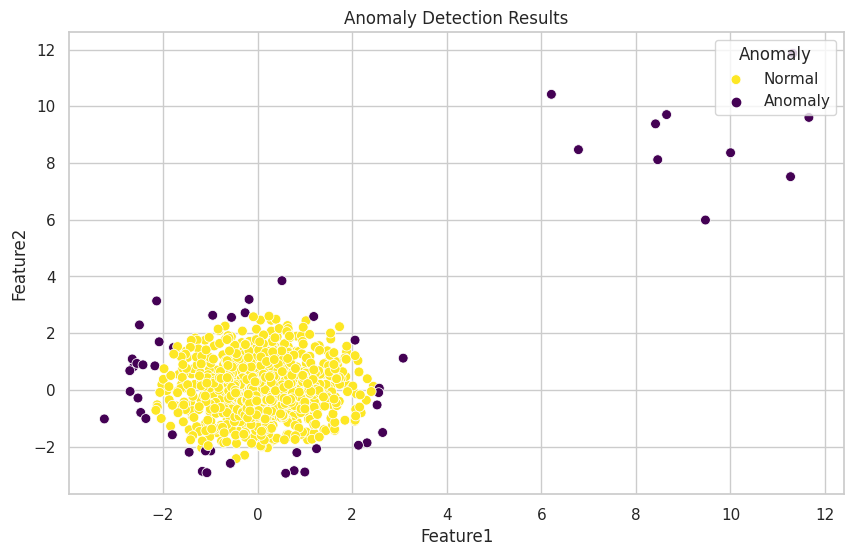

In [8]:
sns.set(style="whitegrid")

# Create a scatter plot with colors based on the 'Anomaly' column
plt.figure(figsize=(10, 6))  # figure size
scatter = sns.scatterplot(x='Feature1', y='Feature2', hue='Anomaly', data=df, s=50, palette='viridis')

# Set plot title and labels
plt.title('Anomaly Detection Results')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

scatter.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly']) # Display legend
plt.show()

## Bonus ✨ EKG Görüntülerinden Anomaly Tespiti
Bu örnekte, ECG5000 veri kümesindeki anormallikleri tespit etmek için bir autoencoder eğiteceğiz. Bu veri kümesi, her biri 140 veri noktası içeren 5,000 Elektrokardiyogram içermektedir. Veri kümesinin basitleştirilmiş bir sürümünü kullanacağız, burada her örnek ya 0 (anormal ritme karşılık gelen) ya da 1 (normal ritme karşılık gelen) olarak etiketlenmiştir. 

**Not:** Bu etiketli bir veri kümesidir, bu yüzden bunu supervised learning problemi olarak ifade edebiliriz. Bu örneğin amacı, etiketlerin mevcut olmadığı daha büyük veri kümelerine uygulayabileceğiniz anomali tespiti kavramlarını açıklamaktır (örneğin, normal ritimlerin binlerce olduğu ve yalnızca birkaç anormal ritmin olduğu durumlarda).

Autoencoder'ı yalnızca normal ritimler üzerinde eğiteceğiz, ardından tüm verileri yeniden oluşturmak için kullanacağız. Hipotezimiz, anormal ritimlerin daha yüksek yeniden oluşturma hatasına sahip olacağıdır. Ardından, bir ritmi bir sabit eşik değerini aştığında bir anormallik olarak sınıflandıracağız.

## Autoencoder Nedir?
Autoencoder, en temelde inputu outputa kopyalamak için eğitilen özel bir neural network türüdür. Örneğin, elle yazılmış bir rakamın görüntüsü verildiğinde, bir autoencoder önce görüntüyü daha düşük boyutlu hale getirir, ardından tekrar bir görüntüye çözümler. Autoencoder, veriyi sıkıştırmayı öğrenirken yeniden oluşturma hatasını en aza indirgemeyi amaçlar.
![Autoencoder for Mnist dataset](https://miro.medium.com/v2/resize:fit:1003/1*AJ_zWZundfZ2-11eZUw5GA.png)

Autoencoder hakkında daha fazla bilgi edinmek için Ian Goodfellow, Yoshua Bengio ve Aaron Courville tarafından yazılan "[Deep Learning](https://www.deeplearningbook.org/)" kitabının 14. bölümünü okuyabilirsiniz.

#### Interactive Lab: [Bu siteye gidebilirsiniz](https://anomagram.fastforwardlabs.com/#/)

In [9]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model


In [10]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [11]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

### Normalize the data to [0,1]




In [12]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

Şimdi, sadece normal ritimli olanları(Datasetimizde 1 olarak etiketlenmiş) kullanarak autoencoder eğiteceğiz. Aşağıda normal ritimli olanları ve olmayanları ayırıyoruz.

In [13]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]#for normal rhythms
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]#for abnormal rhythms
anomalous_test_data = test_data[~test_labels]

### Normal Ekg grafiği

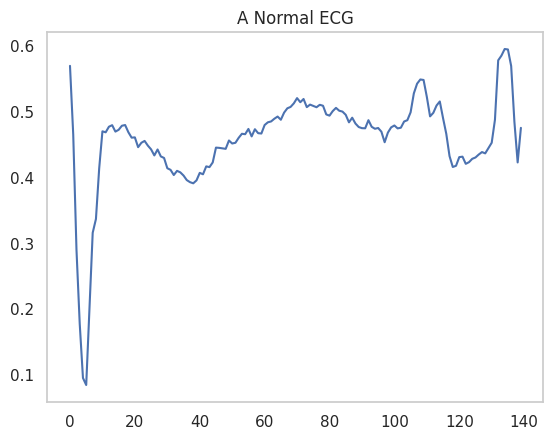

In [14]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

### Anormal Ritme Sahip Ekg Görüntüsü

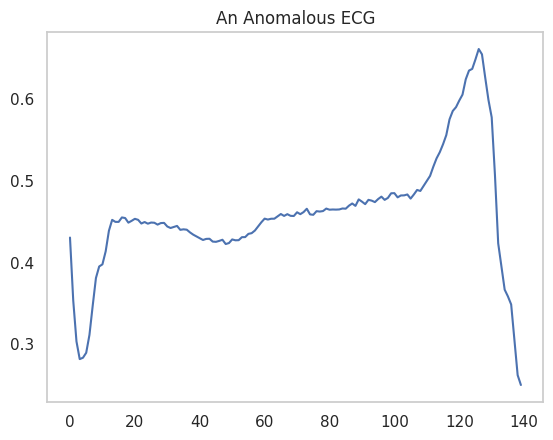

In [15]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

## Model Build edelim

In [16]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Dense(32, activation="relu"),
          layers.Dense(16, activation="relu"),
          layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(140, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()

In [17]:
autoencoder.compile(optimizer='adam', loss='mae')

### Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [18]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 47ms/step - loss: 0.0584 - val_loss: 0.0535
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0561 - val_loss: 0.0519
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0533 - val_loss: 0.0503
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0496 - val_loss: 0.0491
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0458 - val_loss: 0.0466
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0416 - val_loss: 0.0444
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0378 - val_loss: 0.0426
Epoch 8/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0348 - val_loss: 0.0411
Epoch 9/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0324 - val_loss: 0.0398
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0305 - val_loss: 0.0391
Epoch 11/20
5/5 [=================

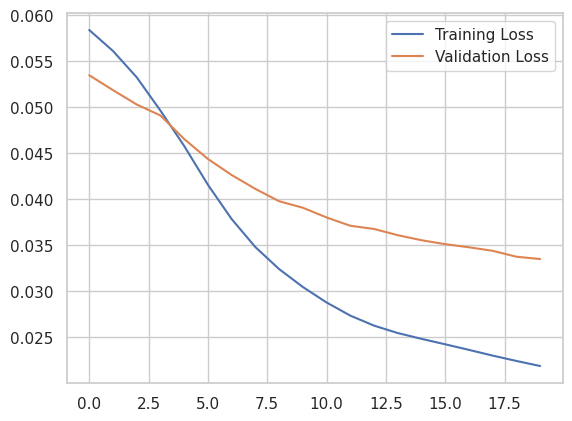

In [19]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

### Şimdi, bir EKG'yi normal eğitim örneklerinden bir standart sapma daha büyük olan hatayla anormal olarak sınıflandıracağız. İlk olarak, eğitim setinden normal bir EKG'yi, autoencoder tarafından kodlandıktan ve çözüldükten sonraki yeniden oluşturmayı ve yeniden oluşturma hatasını çizelim.

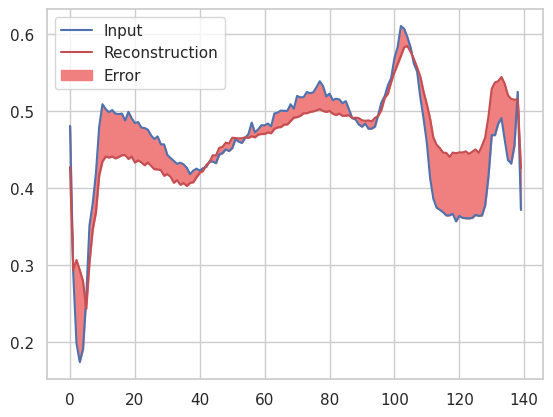

In [20]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

## Şimdi aynı durumu anormal ritme sahip olan bir EKG için çizelim

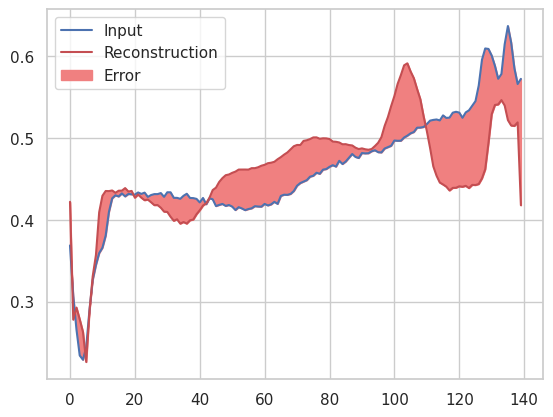

In [21]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

## Detect anomalies
Eğer loss değerimiz bir threshold değerimizden yüksek ise onları anomaly olarak tespit edeceğiz.Mean Average Error normal ritimler için training setten hesaplanacak. Sonrasında da eğer yeniden oluşturduğumuz örneklerin hatası bir standart sapma kadar yüksekse anomali olarak sınıflandıracağız. 

Training setteki normal EKG'ler üzerinde yeniden oluşturma hatasını(reconstruction error) çizelim.

74/74 [==============================] - 0s 1ms/step


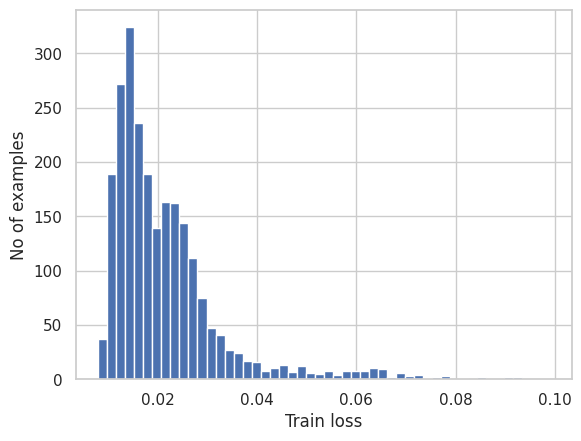

In [22]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [23]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.033317883


14/14 [==============================] - 0s 1ms/step


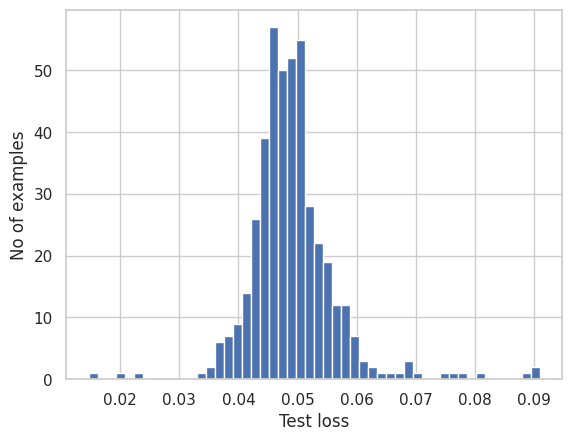

In [24]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [25]:
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))
    print("Precision = {}".format(precision_score(labels, predictions)))
    print("Recall = {}".format(recall_score(labels, predictions)))

In [26]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.942
Precision = 0.9921568627450981
Recall = 0.9035714285714286


## References

* https://www.researchgate.net/publication/224384174_Isolation_Forest
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
* https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/
* https://medium.com/@parulsharma_8357/isolation-forest-62fcb1de4cf5